# Bài tập về máy học 1 - Hồi quy tuyến tính

## Hồi quy tuyến tính đơn biến

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [32]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Xem dữ liệu

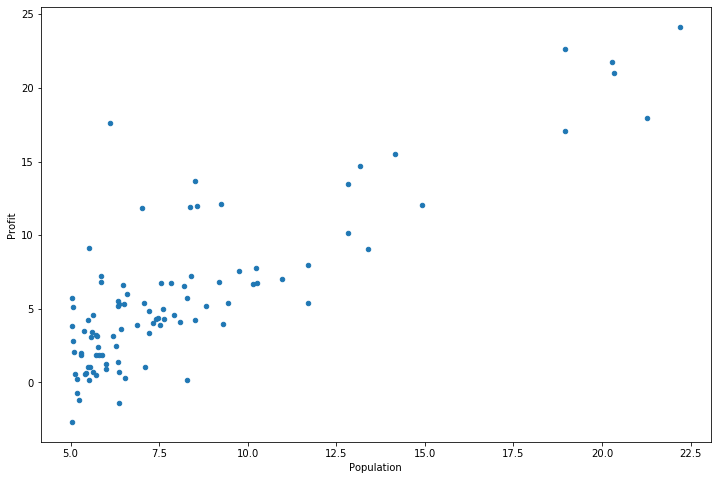

In [33]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

Bây giờ chúng ta hãy sử dụng một gradient descent để đạt được hồi quy tuyến tính, để giảm thiểu hàm chi phí。 Các phương trình được thực hiện trong ví dụ mã sau được trình bày chi tiết trong "ex1.pdf" trong thư mục "Bài tập".

Đầu tiên, chúng ta sẽ tạo một hàm chi phí với tham số θ là hàm tính năng
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
Trong đó：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [34]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Hãy thêm một cột vào tập huấn luyện để chúng ta có thể sử dụng giải pháp véc tơ để tính toán chi phí và độ dốc

In [35]:
data.insert(0, 'Ones', 1)

Bây giờ hãy thực hiện một số khởi tạo biến.

In [36]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X Là tất cả các hàng, loại bỏ cột cuối cùng
y = data.iloc[:,cols-1:cols]

Quan sát xem X (tập huấn luyện) và y (biến mục tiêu) có đúng không.

In [37]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [38]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Hàm chi phí phải là một ma trận numpy，Vì vậy, chúng ta cần chuyển đổi X và Y，Sau đó, bạn có thể sử dụng chúng. Chúng ta cũng cần khởi tạo theta.

In [39]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

theta là một ma trận (1,2)

In [40]:
theta

matrix([[0, 0]])

Nhìn vào kích thước

In [41]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Tính hàm chi phí (giá trị ban đầu của theta là 0)..

In [42]:
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [43]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Khởi tạo một số biến bổ sung - tốc độ học tập α và số lần lặp để thực hiện.

In [44]:
alpha = 0.01
iters = 1000

Bây giờ chúng ta hãy chạy một thuật toán gradient descent với tham số θ thích hợp cho tập huấn luyện của chúng tôi.

In [45]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Cuối cùng, chúng ta có thể sử dụng các tham số được trang bị của mình để tính hàm chi phí (lỗi) của mô hình được đào tạo

In [46]:
computeCost(X, y, g)

4.515955503078912

Bây giờ hãy vẽ mô hình tuyến tính và dữ liệu, và trực quan thấy sự phù hợp của nó.

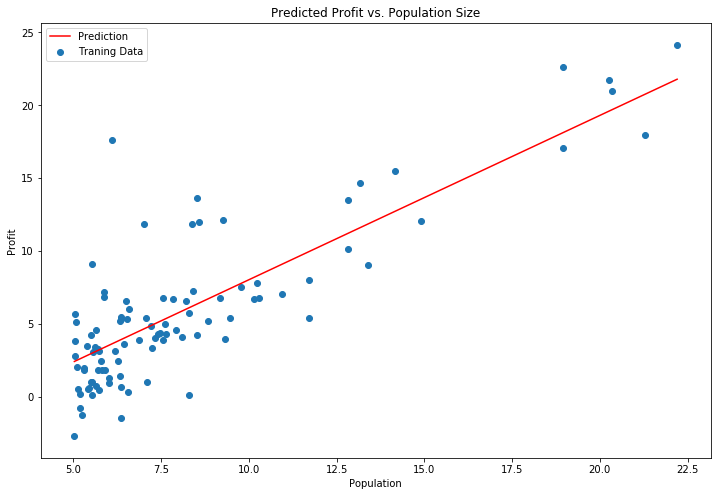

In [47]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

Vì hàm phương trình gradient cũng tạo ra một vectơ chi phí trong mỗi lần lặp đào tạo, chúng ta cũng có thể vẽ đồ thị. Lưu ý rằng chi phí luôn giảm - đây là một ví dụ về vấn đề tối ưu hóa lồi.

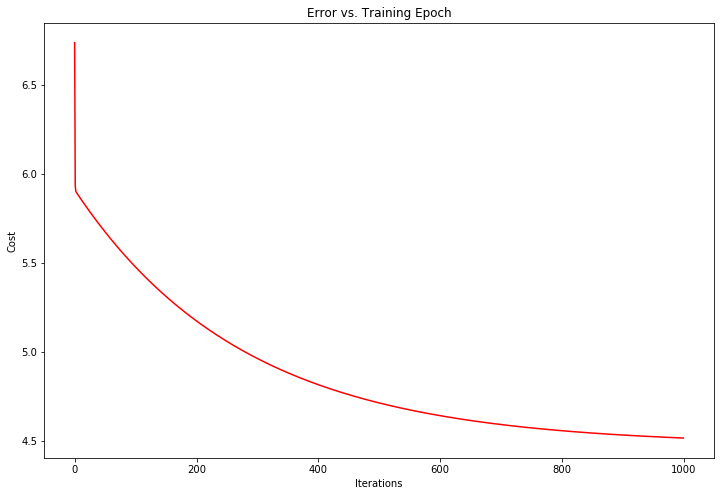

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## Hồi quy tuyến tính đa biến

Bài tập 1 cũng bao gồm một bộ dữ liệu về giá nhà với 2 biến số (kích thước nhà, số phòng ngủ) và mục tiêu (giá nhà). Chúng tôi sử dụng các kỹ thuật chúng tôi đã áp dụng để phân tích tập dữ liệu.

In [49]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Đối với tác vụ này, chúng tôi đã thêm một bước chuẩn hóa tính năng bước tiền xử lý khác. Điều này là đơn giản cho Pandas

In [50]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Bây giờ chúng tôi lặp lại các bước tiền xử lý từ Phần 1 và chạy chương trình hồi quy tuyến tính trên tập dữ liệu mới.

In [51]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.1307033696077189

Chúng tôi cũng có thể nhanh chóng xem tiến độ đào tạo của cái này.

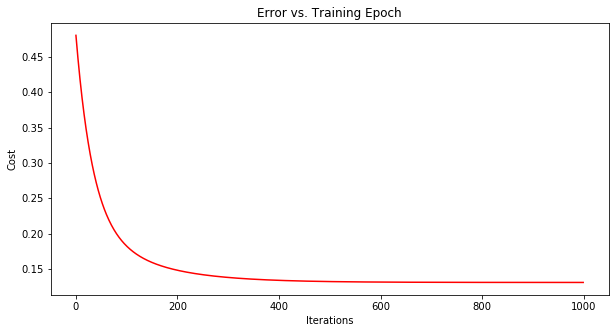

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

Chúng ta cũng có thể sử dụng các hàm hồi quy tuyến tính của scikit-learn thay vì thực hiện các thuật toán này từ đầu. Chúng tôi áp dụng thuật toán hồi quy tuyến tính của scikit-learn cho dữ liệu từ Phần 1 và xem nó hoạt động như thế nào

In [58]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Hiệu suất dự đoán của mô hình scikit-learn

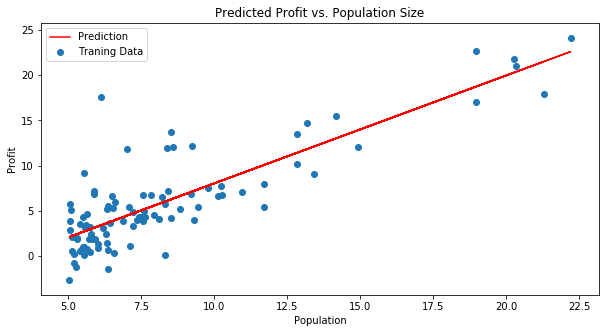

In [62]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（công thức chuẩn）
Công thức chuẩn là tìm tham số tối thiểu hóa hàm chi phí bằng cách giải phương trình sau：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 Giả sử ma trận tính năng tập huấn luyện của chúng tôi là X（chứa${{x}_{0}}=1$）Và kết quả tập huấn luyện của chúng tôi là vectơ y，Sau đó sử dụng phương trình bình thường để giải vectơ $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
ký hiệu T nghĩa là chuyển vị，ký hiệu-1 là nghịch đảo。Hãy để ma trận $A={{X}^{T}}X$，sau đó：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

So sánh độ dốc gốc và phương trình bình thường：

Độ dốc gốc: cần chọn tốc độ học tập α，Yêu cầu nhiều lần lặp. Nó cũng được áp dụng khi số lượng tính năng lớn, áp dụng cho các loại mô hình khác nhau

Phương trình bình thường: không cần chọn tỷ lệ học tập α，Tính một lần, cần tính.${{\left( {{X}^{T}}X \right)}^{-1}}$，Nếu số lượng tính năng n lớn, hoạt động tốn kém，Bởi vì độ phức tạp thời gian tính toán của nghịch đảo ma trận là O(n3)，Nói chung, khi n nhỏ hơn 10000 thì vẫn chấp nhận được. Nó chỉ phù hợp với các mô hình tuyến tính và không phù hợp với các mô hình khác như mô hình hồi quy logistic.


In [55]:
# 
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X tương đương với X.T.dot(X)
    return theta

In [59]:
final_theta2=normalEqn(X, y)#Nó cảm thấy một chút khác biệt với giá trị theta của giảm độ dốc hàng loạt
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [57]:
#Kết quả của việc giảm độ dốc là matrix([[-3.24140214,  1.1272942 ]])